In [3]:
# Syväoppiminen: Osa 1: Perseptroni
# Kirjoita tähän omat tietosi!
student_name = 'Adham Naderi'
student_id = 'AB8911'

## Tehtävä 1-1
### Aihe: Onnellisuus, Luokittelija: Perseptroni (3 p)

Tutustu aineistoon *Somerville Happiness Survey Data Set* osoitteessa https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey .

Esikäsitellään aineisto. Tiedosto on UTF-16-enkoodattu.

In [6]:

# Esikäsittelyn Toteutus on kirjoitettu tässä tehtävässä valmiiksi
import pandas as pd

df = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
    'info-availability',
    'cost-of-housing',
    'quality-public-schools',
    'trust-in-local-police',
    'maintenance-of-streets',
    'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Jaa  aineisto koulutus- (67%) ja testausaineistoon (33%) (`X_train`, `y_train`, `X_test`, `y_test`).
Käytä satunnaissiementä `9001`.

In [7]:
# train_test_split sklearn.model_selection:sta on toiminto jota käytetään tietojoukon jakamiseen, harjoitus- ja testausjoukoiksi.
from sklearn.model_selection import train_test_split
# StandardScaler sklearn.preprocessingista on metoodi jota käytetään ominaisuuksien standardointiin poistamalla keskiarvo ja skaalamalla ne yksikkövarianssiin.
from sklearn.preprocessing import StandardScaler


# meillä on x piirre ja y on luokka jotka ovat tässä jaettu training sekä testing lohkoihin. Tämän takia meillä on train-test_split jonka sisällä merkitsemme test_size 0.33.
X = df.drop(columns='happy')
y = df['happy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)


# scaler.fit opettelee kaikki parametrit
# scaler.fit_transform aloittaa vähentämisen jokaisesta pisteestä keskiarvon ja jakaa standardi poikkeamalla 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Lineaarinen perseptroni-luokittelija

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Tallenna luokittelija `pc`-muuttujaan.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`. Vinkki: `decision_function()`.

3. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

4. Laske regressiolle ROC-arvot `scikit-learn`-kirjaston `metrics`-moduulin avulla. Laske myös ROC-käyrän alainen alue muuttujaa `auc`. Piirrä kynnysarvon optimointikäyrä `matplotlib`-kirjastolla.

5. Kirjoita `pohdinta`-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät.

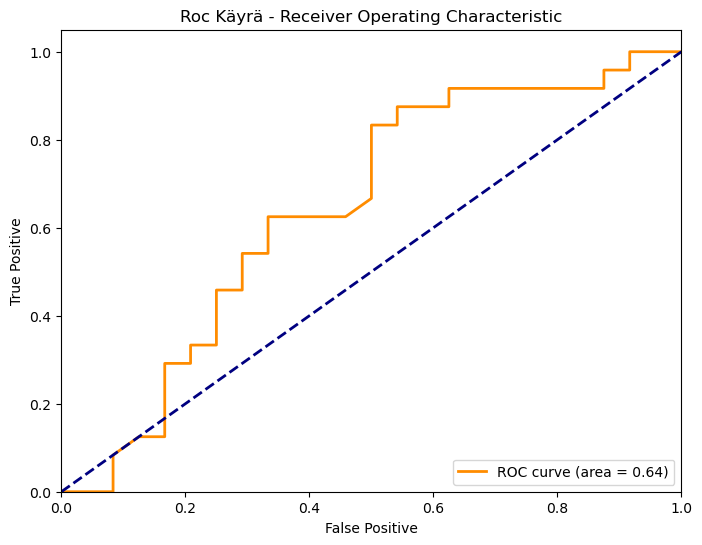

In [9]:
# Kirjoita toteutuksesi tähän soluun.
import numpy as np
from sklearn.linear_model import Perceptron
# Perceptron on yksinkertainen neuroverkko, Se on yksikerroksinen 
# neuroverkko, joka käyttää aktivaatiofunktiota luokittelun tekemiseen.
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Luodaan Perceptron-luokittelija
pc = Perceptron()

# Sovitetaan luokittelija koulutusdataan
pc.fit(X_train, y_train)

# Ennustetaan todennäköisyydet olla luokassa
# Tässä "decision_function" metoodi auttaa meitä ennustaa luokittlijoitten antamat pisteet 
# jotka voidaan myöhemmin muutta todennäköisyyksiksi.
y_score = pc.decision_function(X_test)

# Tällä ennustamme testidataa ja tallennetaan se y_pred muuttujaan.
y_pred = pc.predict(X_test)

# Luodaan luokitteluraportti ja sekaannusmatriisi
# Elikkä "cr" = classification_report ja "cm" = confusion matrix
# Tässä laskemme testidataa ennusteiden ja todellisten arvojen perusteella
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Lasketaan ROC-käyrä ja AUC-arvo
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

# ROC-käyrä
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Roc Käyrä - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# -----------------------------------------------------------------------
# ROC KÄYRÄ SELITYS
# ROC-käyrä (vastaanottimen toimintakäyrä) on kaavio, 
# joka näyttää luokitusmallin suorituskyvyn kaikilla luokituskynnyksillä. 
# Tämä käyrä kuvaa kaksi parametria: True Positive Rate. 
# Väärä positiivinen korko
# -----------------------------------------------------------------------

# -----------------------------------------------------------------------
# AUC-ARVON SELITYS
# AUC-arvo (Area Under the Curve) on mittari, 
# joka arvioi ROC-käyrän (Receiver Operating Characteristic) ala-aluetta. 
# ROC-käyrä kuvaa luokittelijan suorituskykyä eri kynnysarvoilla, 
# ja AUC-arvo antaa yleiskuvan siitä, kuinka hyvin luokittelija 
# erottaa positiiviset ja negatiiviset esimerkit.

# AUC-arvoilla on seuraavat tulkinnat:

# AUC = 1: Täydellinen luokittelija, joka erottaa täydellisesti 
# positiiviset ja negatiiviset esimerkit kaikilla kynnysarvoilla.

# AUC = 0.5: Luokittelija, joka tekee satunnaisia ennusteita 
# ja on yhtä hyvä kuin sattumanvarainen arvaus.

# 0.5 < AUC < 1: Luokittelija, joka on parempi kuin sattumanvarainen 
# arvaus, mutta sen suorituskyky voi vaihdella kynnysarvojen mukaan.

# Tässä tapauksesssa minun mielestäni AUC-arvo antaa meille käsityksen miten
# meidän Perceptroni luokittelija käsittelee positiiviset ja negaativset arvot.
# -----------------------------------------------------------------------

In [10]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.625


In [16]:
# Kirjoita toteutuksesi tähän soluun.

# Pohdintaa.
pohdinta = """
ROC-käyrä antaa visuaalisen esityksen luokittelijan suorituskyvystä eri kynnysarvoilla.
AUC mittaa luokittelijan kykyä erottaa positiiviset ja negatiiviset
esimerkit. Korkeampi AUC-arvo osoittaa parempaa suorituskykyä.

Tarkkuus mittaa kuinka monta positiiviseksi ennustettua tapausta oli todella positiivisia.
Se kertoo luokittelijan tarkkuudesta positiivisten ennusteiden suhteen.

ROC-käyrä ja tarkkuus ovat hyödyllisiä mittareita, mutta niiden tulkintaan vaikuttavat myös
ongelman luonne ja luokkien tasapaino. 

Kynnysarvon optimointikäyrä auttaa löytämään sopivan kynnysarvon, joka tasapainottaa
tarkkuuden ja palautepisteen välillä.
"""

In [37]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla myös kaaviokuva.

cr = cm = auc = fig = None

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Pohdinta: {pohdinta}')
fig

Classification report:
 None
Confusion matrix:
 None
auc: None
Pohdinta: 
ROC-käyrä antaa visuaalisen esityksen luokittelijan suorituskyvystä eri kynnysarvoilla.
AUC mittaa luokittelijan kykyä erottaa positiiviset ja negatiiviset
esimerkit. Korkeampi AUC-arvo osoittaa parempaa suorituskykyä.

Tarkkuus mittaa kuinka monta positiiviseksi ennustettua tapausta oli todella positiivisia.
Se kertoo luokittelijan tarkkuudesta positiivisten ennusteiden suhteen.

ROC-käyrä ja tarkkuus ovat hyödyllisiä mittareita, mutta niiden tulkintaan vaikuttavat myös
ongelman luonne ja luokkien tasapaino. 

Kynnysarvon optimointikäyrä auttaa löytämään sopivan kynnysarvon, joka tasapainottaa
tarkkuuden ja palautepisteen välillä.



## Tehtävä 1-2

### Aihe: Uutisryhmien viestit, Luokittelija: Perseptroni (3 p)

Tutustu valmiiseen aineistoon

* `sklearn.datasets.fetch_20newsgroups`

Tässä aineistossa on viestejä, joita lähetetty 20 uutisryhmään. Aineistoa ei tarvitse esikäsitellä. Käytetään luokittelussa seuraavia kategorioista:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

Aineisto on jaettu valmiiksi test- ja train-aliaineistoihin (`fetch_20newsgroups(subset)`. Käytä seuraavia muuttujia opetus- ja testiaineistoilla  (`X_train`, `y_train`, `X_test`, `y_test`).

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# Lataa opetusaineisto valituilla kategorioilla
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                              remove=('headers', 'footers', 'quotes'))

# Lataa testiaineisto valituilla kategorioilla
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                             remove=('headers', 'footers', 'quotes'))

# TfidfVectorizer muuntaa tekstidokumentit numeeriseen muotoon, jossa sanat ovat vektoreita.
vectorizer = TfidfVectorizer()

# Muunna opetusaineisto vektorimuotoon ja opeta vektorisaattori siinä samalla
# Tämä vaihe käsittelee opetusaineiston ja muuttaa tekstit vektorimuotoon käyttäen TF-IDF (term frequency-inverse document frequency) -menetelmää.
X_train = vectorizer.fit_transform(ng_train.data)

# Muunna testiaineisto vektorimuotoon käyttäen opetettua vektorisaattoria
# Tässä vaiheessa testiaineisto muunnetaan samalla tavalla vektorimuotoon kuin opetusaineisto, mutta käytetään aiemmin opetettua vektorisaattoria.
X_test = vectorizer.transform(ng_test.data)

# Luokitellaan viestit luokkiin
# Määritellään luokat (kategorioiden indeksit) opetus- ja testiaineistolle.
y_train = ng_train.target
y_test = ng_test.target


1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Tallenna luokittelija `pc`-muuttujaan. Käytä satunnaissiementä `12501`.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`.

3. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

                    precision    recall  f1-score   support

         rec.autos       0.85      0.92      0.88       396
rec.sport.baseball       0.87      0.78      0.82       397
  rec.sport.hockey       0.86      0.87      0.87       399

          accuracy                           0.86      1192
         macro avg       0.86      0.86      0.86      1192
      weighted avg       0.86      0.86      0.86      1192



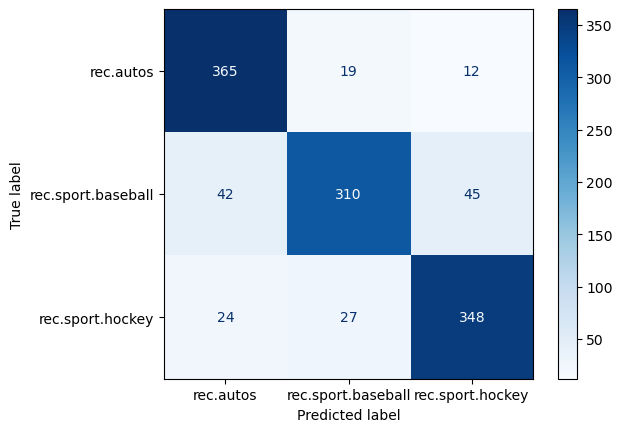

In [6]:
# Luodaan Perceptron-luokittelijamalli, joka on yksinkertainen lineaarinen luokittelija.
# Random_state on satunnaislukugeneraattorin siemen, joka vaikuttaa mallin satunnaisuuteen.
classifier = Perceptron(random_state=12501)

# Malli sovitetaan eli opetetaan käyttäen opetusaineistoa. Se yrittää oppia yhteyksiä
# tekstisisältöjen ja niiden vastaavien luokkien välillä.
classifier.fit(X_train, y_train)

# Malli ennustaa testiaineistolle kuuluvat luokat käyttäen opetettua tietoa.
y_pred = classifier.predict(X_test)

# Luokitteluraportti sisältää erilaisia arviointimittareita, kuten tarkkuuden, palautuksen ja F1-pisteytyksen,
# sekä luokkakohtaisia arvoja. Se antaa kattavan kuvauksen mallin suorituskyvystä.
print(classification_report(y_test, y_pred, target_names=ng_train.target_names))

# Luo ja näytä sekaannusmatriisin kuvaaja
# Sekaannusmatriisi näyttää, kuinka monta kertaa malli ennusti kunkin luokan oikein ja kuinka monta kertaa väärin.
# ConfusionMatrixDisplay auttaa visualisoimaan sekaannusmatriisia selkeästi.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ng_train.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [53]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
cr = classification_report(y_test, y_pred, target_names=ng_train.target_names)

print(f"Predict: {y_pred} and score: {y_score}" "\n")
print(f'Perceptron average test accuracy: {classifier.score(X_test, y_test)}')
print(f"Confusion Matrix:\n{cm}" "\n")
print(f"Classification Report:\n{cr}")


Predict: [1 2 0 ... 0 2 0] and score: [[-0.39471572  0.36470677 -0.40132594]
 [-0.38945117 -0.0165985  -0.0831777 ]
 [ 0.29724703 -0.5643552  -0.58085838]
 ...
 [ 0.07609883 -0.01136881 -0.2105996 ]
 [-0.81155159 -0.40523179  0.44488041]
 [-0.29881446 -0.00164123 -0.40890744]]

Perceptron average test accuracy: 0.8582214765100671
Confusion Matrix:
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]

Classification Report:
                    precision    recall  f1-score   support

         rec.autos       0.85      0.92      0.88       396
rec.sport.baseball       0.87      0.78      0.82       397
  rec.sport.hockey       0.86      0.87      0.87       399

          accuracy                           0.86      1192
         macro avg       0.86      0.86      0.86      1192
      weighted avg       0.86      0.86      0.86      1192



In [48]:
#Piirretään kuva sekaannusmatriisista

In [49]:
# TODO: sekaannusmatriisin piirtäminen
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import matplotlib.pyplot as plt

#conf_matrix = confusion_matrix(y_test, y_pred)

#fig, ax = plt.subplots(figsize=(8, 6))

#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ng_test.target_names)
#disp.plot(cmap=plt.cm.Blues, ax=ax)
#ax.set_title("Confusion Matrix")

#plt.tight_layout()
#plt.show()

# Tehtävä 1-3) (2 p)
Toteuta sama myös toisella `categories_2` -kategorialistalla,

Pohdinta: Vertaa uutisryhmien opetustuloksia toisiinsa ja pohdi sanallisesti, että mistä mahdolliset erot tuloksissa johtuvat.

Huom! Tähänkin aineistoon (jos kiinnostaa enemmän) voit palata myöhemmin kurssin vapaaehtoisen harjoitustyön parissa.

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.07099884 -0.02973903 -0.07037168]
 [-0.01390205 -0.04815878  0.02197135]
 [-0.02040805  0.00181564 -0.00525724]
 ...
 [ 0.03970282  0.00303829 -0.06106308]
 [-0.08588214  0.11423936 -0.08762901]
 [-0.02221099 -0.00216737 -0.09388986]]
Perceptron average test accuracy: 0.7283531409168081
[[306  43  40]
 [ 74 291  29]
 [ 80  54 261]]


<Figure size 800x600 with 0 Axes>

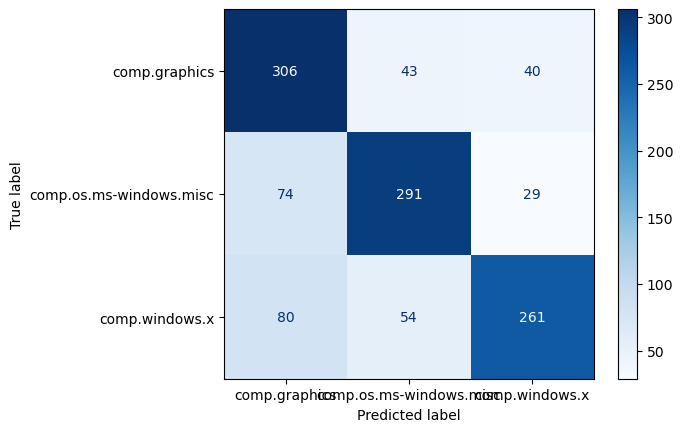

                         precision    recall  f1-score   support

          comp.graphics       0.67      0.79      0.72       389
comp.os.ms-windows.misc       0.75      0.74      0.74       394
         comp.windows.x       0.79      0.66      0.72       395

               accuracy                           0.73      1178
              macro avg       0.74      0.73      0.73      1178
           weighted avg       0.74      0.73      0.73      1178



In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# Määritellään lista kategorioista, joita halutaan käyttää opetus- ja testiaineistossa.
categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# Hakee opetus- ja testidatan categories_2 -kategorioiden avulla
# Ladataan opetus- ja testiaineisto käyttäen valittuja kategorioita ja poistaen tarvittavat osat (headers, footers, quotes).
ng_train_2 = fetch_20newsgroups(subset='train', categories=categories_2,
                                remove=('headers', 'footers', 'quotes'))
ng_test_2 = fetch_20newsgroups(subset='test', categories=categories_2,
                               remove=('headers', 'footers', 'quotes'))

# Luodaan TF-IDF-vektorisaattori käsittelemään tekstidokumentit.
vectorizer = TfidfVectorizer()

# Muuntaa opetusaineiston fit_transform()-metodilla
# Muuntaa opetusaineiston numeeriseen vektorimuotoon käyttäen TF-IDF-vektorisaattoria.
X_train_2 = vectorizer.fit_transform(ng_train_2.data)
y_train_2 = ng_train_2.target

# Muuntaa testiaineiston transform()-metodilla
# Muuntaa testiaineiston vektorimuotoon käyttäen aiemmin opetettua vektorisaattoria.
X_test_2 = vectorizer.transform(ng_test_2.data)
y_test_2 = ng_test_2.target

# Luodaan Perceptron-luokittelijamalli ja sovitetaan se opetusaineistoon.
# max_iter määrittää enimmäismäärän iteraatioita, joita opetusprosessi suorittaa.
# eta0 on opetusnopeus alussa.
clf_2 = Perceptron(max_iter=100, eta0=0.1)
clf_2.fit(X_train_2, y_train_2)

# Ennustaa testiaineistolle kuuluvat luokat käyttäen opetettua Perceptron-mallia.
y_pred_2 = clf_2.predict(X_test_2)
y_score_2 = clf_2.decision_function(X_test_2)

# Tulostaa ennustetut luokat ja mallin antamat pisteet kullekin ennusteelle.
# Laske myös Perceptron-mallin keskimääräinen tarkkuus testiaineistolla.
print(f"Predict: {y_pred_2} and score: {y_score_2}")
print(f'Perceptron average test accuracy: {clf_2.score(X_test_2, y_test_2)}')

# Laske sekaannusmatriisi ja visualisoi se graafisesti ConfusionMatrixDisplay:n avulla.
confusion_mat_2 = confusion_matrix(y_test_2, y_pred_2)
print(confusion_mat_2)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_mat_2, display_labels=categories_2).plot(cmap=plt.cm.Blues)
plt.show()

# Tulostaa luokitteluraportin, joka sisältää erilaisia arviointimittareita Perceptron-mallin suorituskyvyn arviointiin.
print(classification_report(y_test_2, y_pred_2, target_names=categories_2))


In [2]:
# Tehtävän vastauksien ajaminen. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

print(f"Predict: {y_pred_2} and score: {y_score_2}")
print(confusion_matrix(y_test_2, y_pred_2))  # verrataan toteutuneita arvoja ennusteisin
print(classification_report(y_test_2, y_pred_2, target_names=categories_2))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.07099884 -0.02973903 -0.07037168]
 [-0.01390205 -0.04815878  0.02197135]
 [-0.02040805  0.00181564 -0.00525724]
 ...
 [ 0.03970282  0.00303829 -0.06106308]
 [-0.08588214  0.11423936 -0.08762901]
 [-0.02221099 -0.00216737 -0.09388986]]
[[306  43  40]
 [ 74 291  29]
 [ 80  54 261]]
                         precision    recall  f1-score   support

          comp.graphics       0.67      0.79      0.72       389
comp.os.ms-windows.misc       0.75      0.74      0.74       394
         comp.windows.x       0.79      0.66      0.72       395

               accuracy                           0.73      1178
              macro avg       0.74      0.73      0.73      1178
           weighted avg       0.74      0.73      0.73      1178



Sekaannusmatriisin piirtäminen `categories_2` -datalla: